<a href="https://colab.research.google.com/github/LakshyaMalhotra/time-series-analysis/blob/main/time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import os
import gc
import requests
import zipfile
import datetime

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go

%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
colors = list(sns.color_palette('Dark2'))

In [ ]:
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip'
r = requests.get(file_url)
zf = zipfile.ZipFile(io.BytesIO(r.content))
zf.extractall()

In [ ]:
base_dir = 'PRSA_Data_20130301-20170228'
file_name = 'PRSA_Data_Dingling_20130301-20170228.csv'
df = pd.read_csv(os.path.join(base_dir, file_name), encoding='ISO-8859-1')
df.head()

No  year  month  day  hour  PM2.5  ...    PRES  DEWP  RAIN   wd  WSPM   station
0   1  2013      3    1     0    4.0  ...  1020.8 -19.7   0.0    E   0.5  Dingling
1   2  2013      3    1     1    7.0  ...  1021.3 -19.0   0.0  ENE   0.7  Dingling
2   3  2013      3    1     2    5.0  ...  1021.3 -19.9   0.0  ENE   0.2  Dingling
3   4  2013      3    1     3    6.0  ...  1021.8 -19.1   0.0  NNE   1.0  Dingling
4   5  2013      3    1     4    5.0  ...  1022.3 -19.4   0.0    N   2.1  Dingling

[5 rows x 18 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
def convert_to_date(x):
    return datetime.datetime.strptime(x, '%Y %m %d %H')

In [ ]:
del df
gc.collect()

115

In [ ]:
df = pd.read_csv(os.path.join(base_dir, file_name), encoding='ISO-8859-1', 
                 parse_dates=[['year', 'month', 'day', 'hour']], 
                 date_parser=convert_to_date, keep_date_col=True)
df.head()

year_month_day_hour  No  year month day  ...  DEWP  RAIN   wd  WSPM   station
0 2013-03-01 00:00:00   1  2013     3   1  ... -19.7   0.0    E   0.5  Dingling
1 2013-03-01 01:00:00   2  2013     3   1  ... -19.0   0.0  ENE   0.7  Dingling
2 2013-03-01 02:00:00   3  2013     3   1  ... -19.9   0.0  ENE   0.2  Dingling
3 2013-03-01 03:00:00   4  2013     3   1  ... -19.1   0.0  NNE   1.0  Dingling
4 2013-03-01 04:00:00   5  2013     3   1  ... -19.4   0.0    N   2.1  Dingling

[5 rows x 19 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [ ]:
df.month = df['month'].astype(int)

In [ ]:
def missing_values(df):
    data = pd.DataFrame(df.isnull().sum())
    data.columns = ['# missing']
    data['% missing'] = np.round((100 * data['# missing'])/df.shape[0], 2)
    return data

In [ ]:
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')
print(f"\nFeatures:\n{'-'*10}\n{df.columns.tolist()}")
print(f'\nMissing values:\n{"-"*15}\n{missing_values(df)}')
print(f'\nUnique values:\n{"-"*15}\n{df.nunique()}')

Rows: 35064
Columns: 19

Features:
----------
['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

Missing values:
---------------
                     # missing  % missing
year_month_day_hour          0       0.00
No                           0       0.00
year                         0       0.00
month                        0       0.00
day                          0       0.00
hour                         0       0.00
PM2.5                      779       2.22
PM10                       656       1.87
SO2                        730       2.08
NO2                       1234       3.52
CO                        2012       5.74
O3                        1214       3.46
TEMP                        53       0.15
PRES                        50       0.14
DEWP                        53       0.15
RAIN                        51       0.15
wd                         140       0.40
WSP

In [ ]:
df.describe()

No         month  ...          RAIN          WSPM
count  35064.000000  35064.000000  ...  35013.000000  35021.000000
mean   17532.500000      6.522930  ...      0.060366      1.853836
std    10122.249256      3.448752  ...      0.752899      1.309808
min        1.000000      1.000000  ...      0.000000      0.000000
25%     8766.750000      4.000000  ...      0.000000      1.000000
50%    17532.500000      7.000000  ...      0.000000      1.500000
75%    26298.250000     10.000000  ...      0.000000      2.300000
max    35064.000000     12.000000  ...     52.100000     10.000000

[8 rows x 13 columns]

In [ ]:
df_non_indexed = df.copy()

In [ ]:
# Incredibly useful technique for time series data; check the advantages in below cells
df.set_index('year_month_day_hour', inplace=True)
df.head()

No  year  month day hour  ...  DEWP  RAIN   wd  WSPM   station
year_month_day_hour                            ...                                 
2013-03-01 00:00:00   1  2013      3   1    0  ... -19.7   0.0    E   0.5  Dingling
2013-03-01 01:00:00   2  2013      3   1    1  ... -19.0   0.0  ENE   0.7  Dingling
2013-03-01 02:00:00   3  2013      3   1    2  ... -19.9   0.0  ENE   0.2  Dingling
2013-03-01 03:00:00   4  2013      3   1    3  ... -19.1   0.0  NNE   1.0  Dingling
2013-03-01 04:00:00   5  2013      3   1    4  ... -19.4   0.0    N   2.1  Dingling

[5 rows x 18 columns]

In [ ]:
# Once indexed, can be easily sliced using loc, iloc
df.loc['2013-03-01':'2013-03-05']

No  year  month day hour  ...  DEWP  RAIN   wd  WSPM   station
year_month_day_hour                             ...                                 
2013-03-01 00:00:00    1  2013      3   1    0  ... -19.7   0.0    E   0.5  Dingling
2013-03-01 01:00:00    2  2013      3   1    1  ... -19.0   0.0  ENE   0.7  Dingling
2013-03-01 02:00:00    3  2013      3   1    2  ... -19.9   0.0  ENE   0.2  Dingling
2013-03-01 03:00:00    4  2013      3   1    3  ... -19.1   0.0  NNE   1.0  Dingling
2013-03-01 04:00:00    5  2013      3   1    4  ... -19.4   0.0    N   2.1  Dingling
...                  ...   ...    ...  ..  ...  ...   ...   ...  ...   ...       ...
2013-03-05 19:00:00  116  2013      3   5   19  ...  -7.6   0.0  NNE   0.2  Dingling
2013-03-05 20:00:00  117  2013      3   5   20  ...  -7.3   0.0  NNE   0.7  Dingling
2013-03-05 21:00:00  118  2013      3   5   21  ...  -7.3   0.0  NNE   0.2  Dingling
2013-03-05 22:00:00  119  2013      3   5   22  ...  -7.0   0.0    N   1.7  Dingling
2013-03-05 23:00:00  120  2013      3   5   23  ...  -6.9   0.0   NE   0.4  Dingling

[120 rows x 18 columns]

In [ ]:
df.loc['2013':'2015']

No  year  month day  ... RAIN   wd  WSPM   station
year_month_day_hour                          ...                          
2013-03-01 00:00:00      1  2013      3   1  ...  0.0    E   0.5  Dingling
2013-03-01 01:00:00      2  2013      3   1  ...  0.0  ENE   0.7  Dingling
2013-03-01 02:00:00      3  2013      3   1  ...  0.0  ENE   0.2  Dingling
2013-03-01 03:00:00      4  2013      3   1  ...  0.0  NNE   1.0  Dingling
2013-03-01 04:00:00      5  2013      3   1  ...  0.0    N   2.1  Dingling
...                    ...   ...    ...  ..  ...  ...  ...   ...       ...
2015-12-31 19:00:00  24860  2015     12  31  ...  0.0   NE   0.6  Dingling
2015-12-31 20:00:00  24861  2015     12  31  ...  0.0   NW   1.1  Dingling
2015-12-31 21:00:00  24862  2015     12  31  ...  0.0   NE   0.9  Dingling
2015-12-31 22:00:00  24863  2015     12  31  ...  0.0  NNW   1.3  Dingling
2015-12-31 23:00:00  24864  2015     12  31  ...  0.0  NNW   1.3  Dingling

[24864 rows x 18 columns]

In [ ]:
pm_data = df['PM2.5']
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

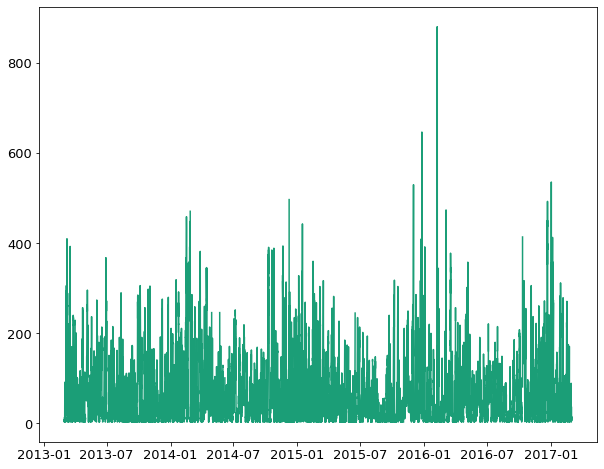

In [ ]:
plt.plot(pm_data, color=colors[0])
plt.show()

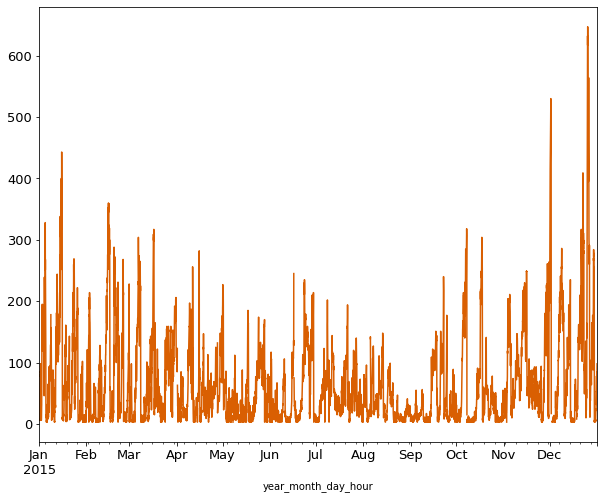

In [ ]:
df_2015 = df.loc['2015']
pm_data_2015 = df_2015['PM2.5']
pm_data_2015.plot(color=colors[1])
plt.show()

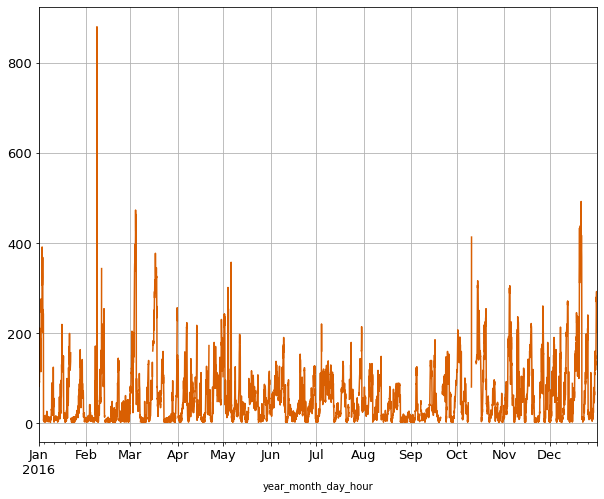

In [ ]:
df_2016 = df.loc['2016']
pm_data_2016 = df_2016['PM2.5']
pm_data_2016.plot(color=colors[1], grid=True)
plt.show()

In [ ]:
fig = px.line(df_non_indexed, x='year_month_day_hour', y='PM2.5', title='PM2.5')
fig.update_xaxes=dict(
    rangeslider_visible=True,
)
fig.show()

In [ ]:
fig = go.Figure()

trace = go.Scatter(x=df_non_indexed['year_month_day_hour'], y=df_non_indexed['PM2.5'])
fig.add_trace(trace)

layout = dict(
    title='PM2.5',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(count=2,
                     label="2y",
                     step="year",
                     stepmode="backward"),
                dict(count=3,
                     label="3y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.update_layout(layout)
fig.show()

<Figure size 1440x576 with 0 Axes>

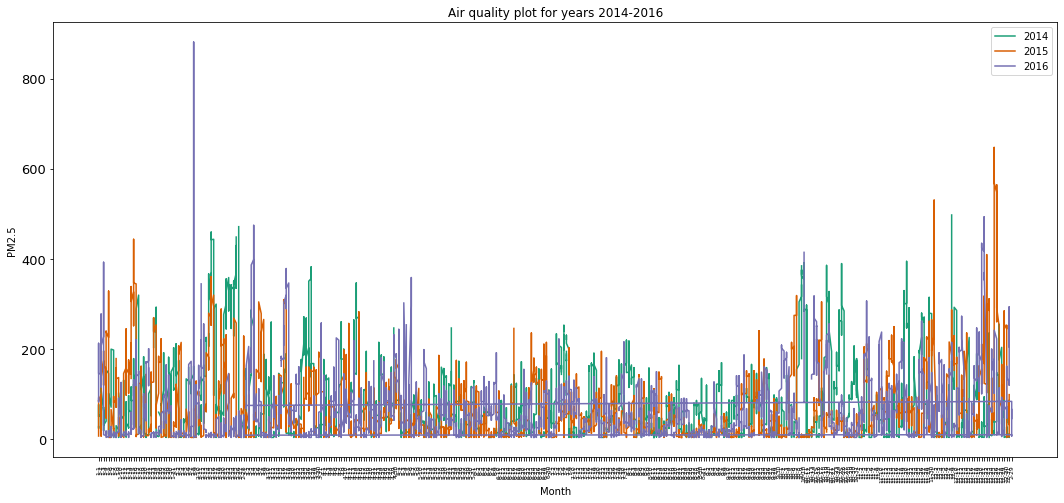

In [ ]:
plt.figure(figsize=(20, 8))
df_2014 = df['2014'].reset_index()
df_2015 = df_2015.reset_index()
df_2016 = df_2016.reset_index()
df_2014['month_day'] = df_2014.apply(lambda x: str(x['month'])+'-'+str(x['day']), axis=1)
df_2015['month_day'] = df_2015.apply(lambda x: str(x['month'])+'-'+str(x['day']), axis=1)
df_2016['month_day'] = df_2016.apply(lambda x: str(x['month'])+'-'+str(x['day']), axis=1)
plt.figure(figsize=(18,8))
plt.plot(df_2014['month_day'], df_2014['PM2.5'], color=colors[0], label='2014')
plt.plot(df_2015['month_day'], df_2015['PM2.5'], color=colors[1], label='2015')
plt.plot(df_2016['month_day'], df_2016['PM2.5'], color=colors[2], label='2016')

plt.legend()
plt.xlabel('Month')
plt.xticks(rotation=90, fontsize=6)
plt.ylabel('PM2.5')
plt.title('Air quality plot for years 2014-2016')
plt.show()

In [ ]:
trace1 = go.Scatter(x=df_2014['month_day'], y=df_2014['PM2.5'], 
                name='2014', text=df_2014['month_day'])
trace2 = go.Scatter(x=df_2015['month_day'], y=df_2015['PM2.5'],
                    name='2015', text=df_2015['month_day'])
trace3 = go.Scatter(x=df_2016['month_day'], y=df_2016['PM2.5'],
                    name='2016', text=df_2016['month_day'])

data = [trace1, trace2, trace3]
layout = dict(title='Air Quality plot for years 2014-2016', 
              yaxis=dict(title='PM2.5'), xaxis=dict(showticklabels=False),
              height=500, width=800)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
df['2014':'2016'][['month', 'PM2.5']].groupby('month').describe()

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0

In [ ]:
df['2014':'2016'][['month', 'PM2.5', 'TEMP']].groupby('month').agg({'PM2.5':['max'], 'TEMP':['min', 'max']})

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -16.6  12.4
2      881.0 -10.9  14.0
3      474.0  -6.4  26.0
4      346.0   1.3  32.0
5      358.0   7.0  41.4
6      245.0  15.1  38.1
7      252.0  16.8  39.2
8      217.0  16.6  36.3
9      240.0   7.8  34.5
10     414.0  -1.4  28.1
11     394.0 -10.3  20.8
12     647.0  -9.7  11.6

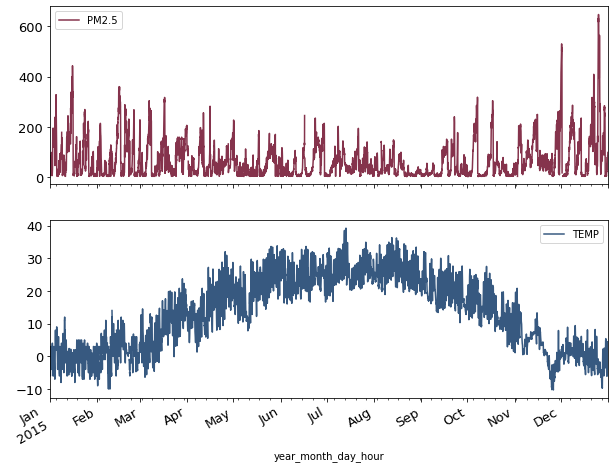

In [ ]:
pm_data_2015 = df['2015'][['PM2.5', 'TEMP']]
pm_data_2015.plot(subplots=True, colormap=plt.cm.RdBu, alpha=0.8)
plt.show()

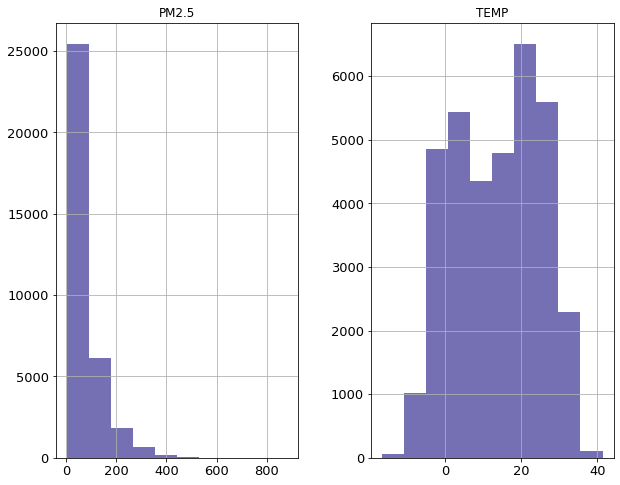

In [ ]:
df[['PM2.5', 'TEMP']].hist(color=colors[2]);

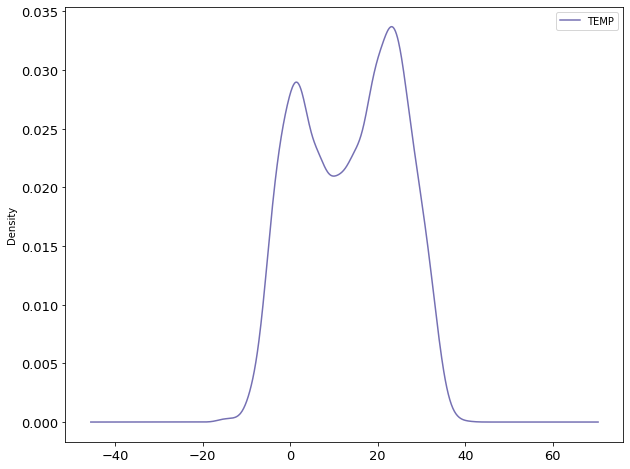

In [ ]:
df[['TEMP']].plot(kind='density', color=colors[2]);

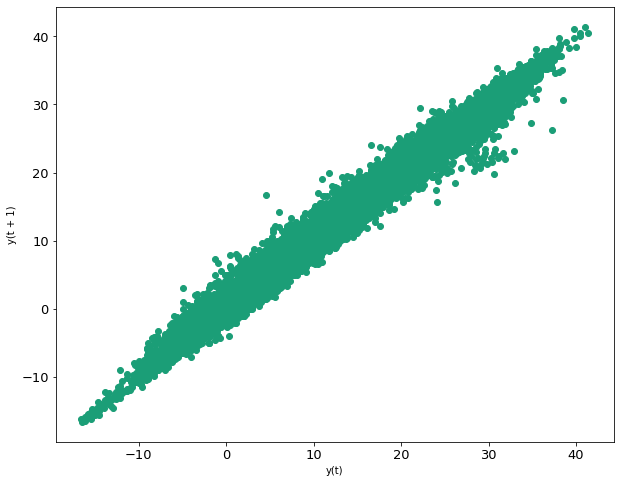

In [ ]:
pd.plotting.lag_plot(df['TEMP'], lag=1, c=[colors[0]]);

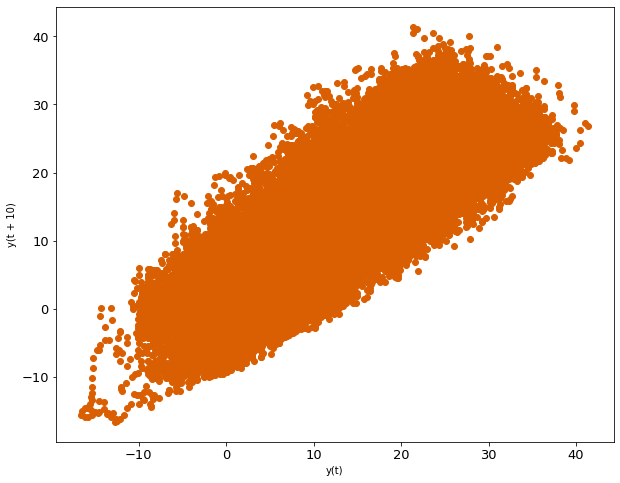

In [ ]:
pd.plotting.lag_plot(df['TEMP'], lag=10, c=[colors[1]]);

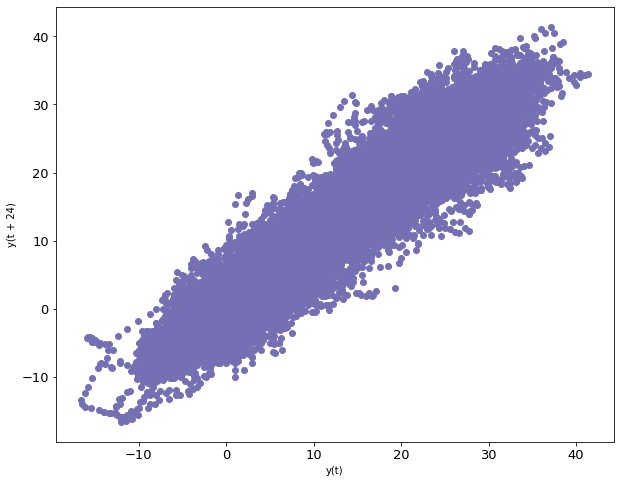

In [ ]:
pd.plotting.lag_plot(df['TEMP'], lag=24, c=[colors[2]]);

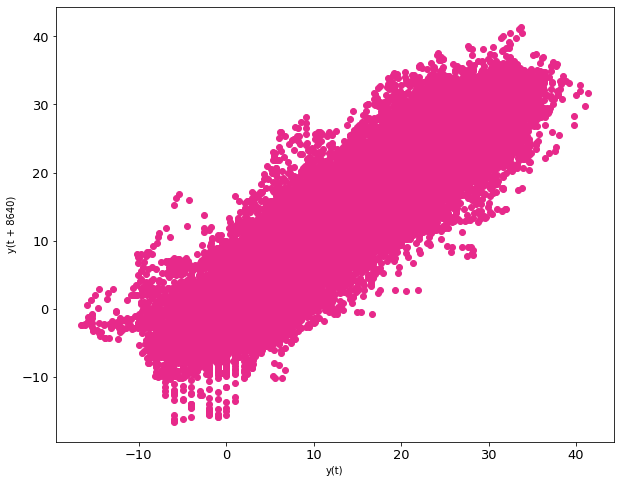

In [ ]:
pd.plotting.lag_plot(df['TEMP'], lag=8640, c=[colors[3]]);

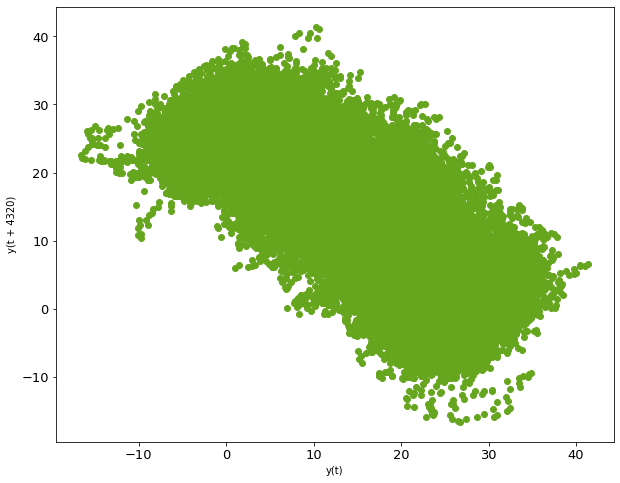

In [ ]:
pd.plotting.lag_plot(df['TEMP'], lag=4320, c=[colors[4]]);

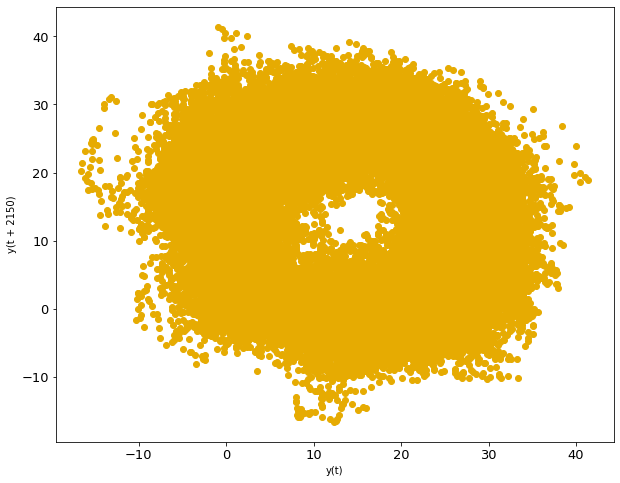

In [ ]:
pd.plotting.lag_plot(df['TEMP'], lag=2150, c=[colors[5]]);

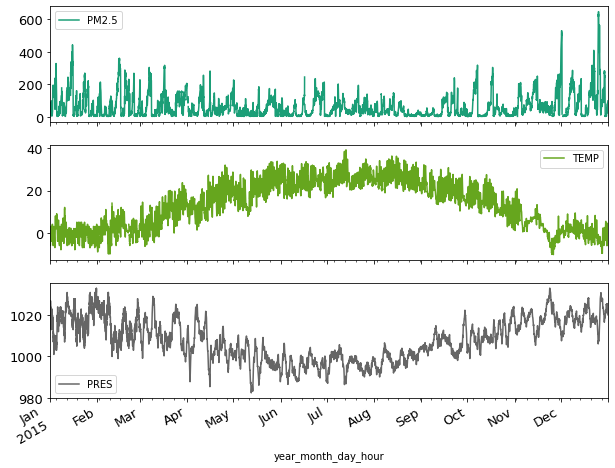

In [ ]:
pm_data_2015 = df['2015'][['PM2.5', 'TEMP', 'PRES']]
pm_data_2015.plot(subplots=True, colormap=plt.cm.Dark2)
plt.show()

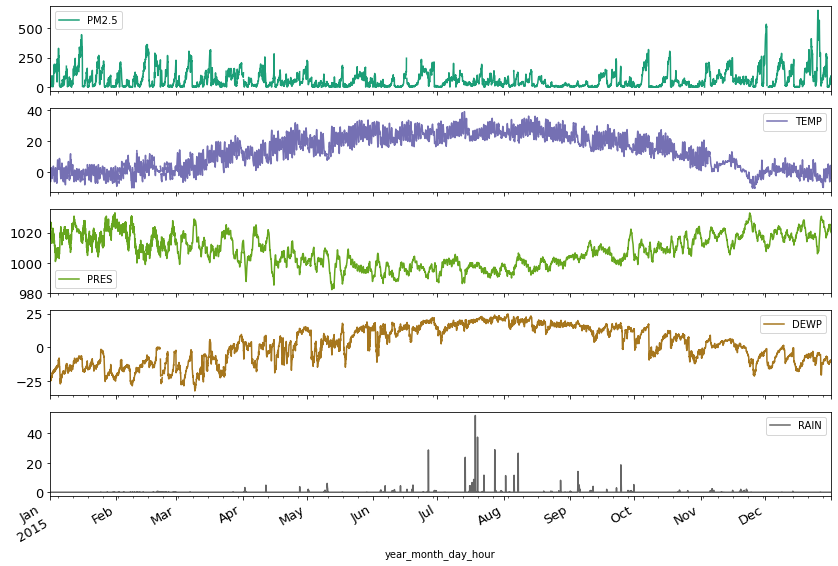

In [ ]:
pm_data_2015 = df['2015'][['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN']]
pm_data_2015.plot(subplots=True, figsize=(14, 10), colormap=plt.cm.Dark2)
plt.show()

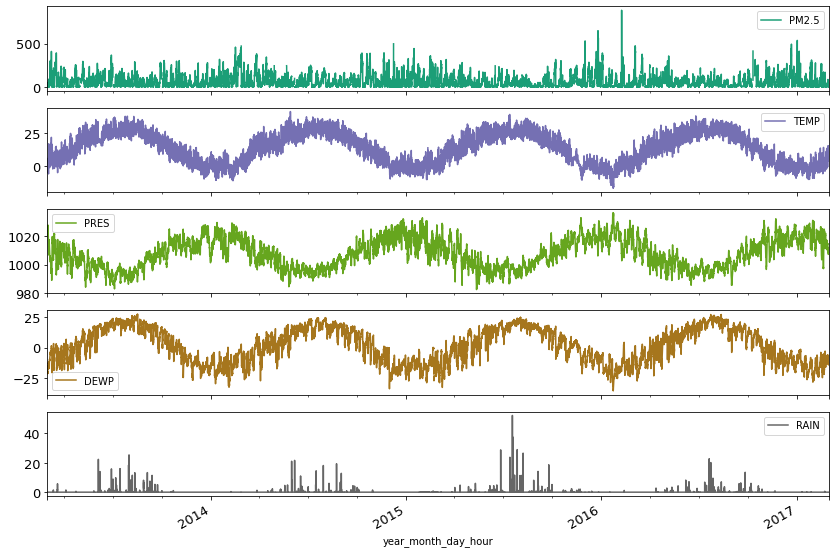

In [ ]:
pm_data = df[['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN']]
pm_data.plot(subplots=True, figsize=(14, 10), colormap=plt.cm.Dark2)
plt.show()

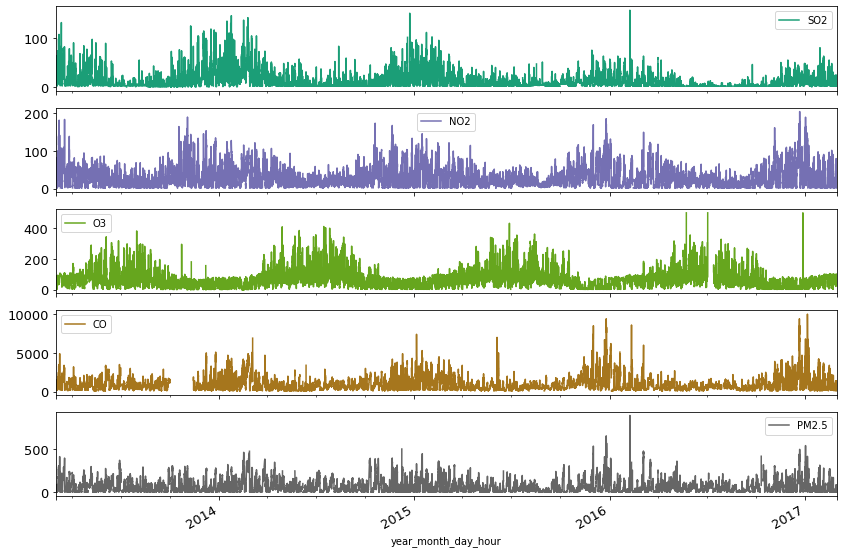

In [ ]:
pm_multi_data = df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']]
pm_multi_data.plot(subplots=True, colormap=plt.cm.Dark2, figsize=(14,10));

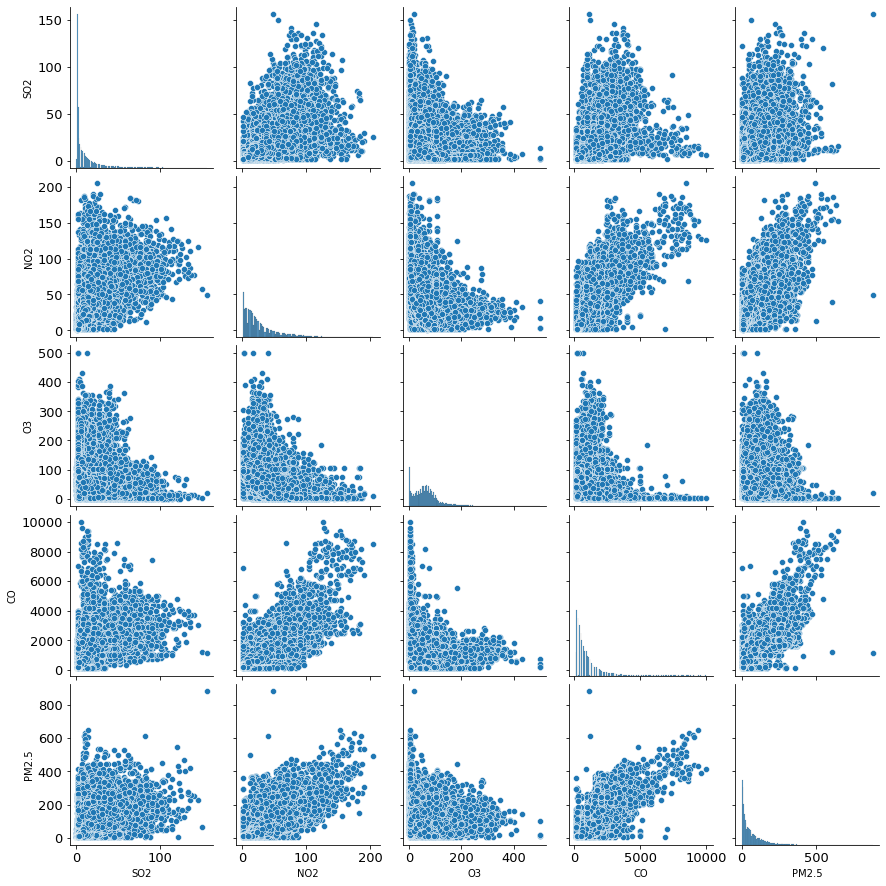

In [ ]:
g = sns.pairplot(df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']]);

In [ ]:
aq_corr = df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']].corr(method='pearson')
aq_corr

SO2       NO2        O3        CO     PM2.5
SO2    1.000000  0.610433 -0.182096  0.529182  0.475117
NO2    0.610433  1.000000 -0.373625  0.798753  0.718170
O3    -0.182096 -0.373625  1.000000 -0.303275 -0.100542
CO     0.529182  0.798753 -0.303275  1.000000  0.802737
PM2.5  0.475117  0.718170 -0.100542  0.802737  1.000000

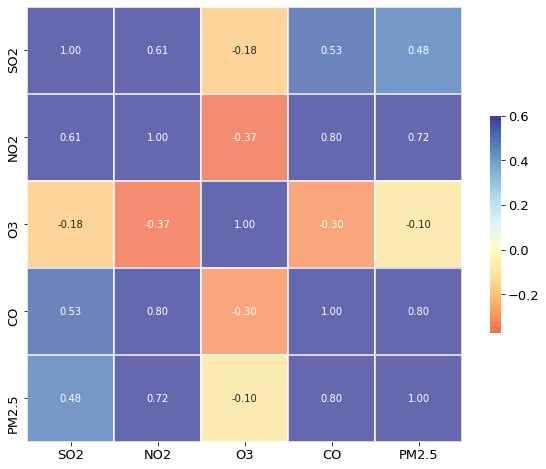

In [ ]:
g = sns.heatmap(aq_corr, vmax=0.6, center=0, square=True, linewidths=1.0, alpha=0.75,
                cbar_kws={'shrink':.5}, annot=True, fmt='.2f', cmap='RdYlBu')
plt.show()

In [ ]:
wd_pm25 = df.groupby('wd').agg(median=('PM2.5', 'median'), 
                     mean=('PM2.5', 'mean'), 
                     max=('PM2.5', 'max'), 
                     min=('PM2.5', 'min')).reset_index()
wd_pm25

wd  median       mean    max  min
0     E    70.0  88.623363  434.0  3.0
1   ENE    56.5  77.685514  647.0  3.0
2   ESE    78.5  96.492276  632.0  3.0
3     N    29.0  57.546221  536.0  3.0
4    NE    32.0  57.390083  530.0  3.0
5   NNE    26.0  53.946239  881.0  3.0
6   NNW    33.0  62.790775  548.0  3.0
7    NW    21.0  52.769116  535.0  3.0
8     S    52.0  72.497281  511.0  3.0
9    SE    70.0  85.045709  617.0  3.0
10  SSE    61.0  79.925967  614.0  3.0
11  SSW    50.0  73.078253  493.0  3.0
12   SW    46.0  70.233140  459.0  3.0
13    W    22.0  49.488104  446.0  3.0
14  WNW    14.0  37.307447  515.0  3.0
15  WSW    39.0  66.725926  451.0  3.0

In [ ]:
df_na = df.copy()
df_na = df_na.dropna()

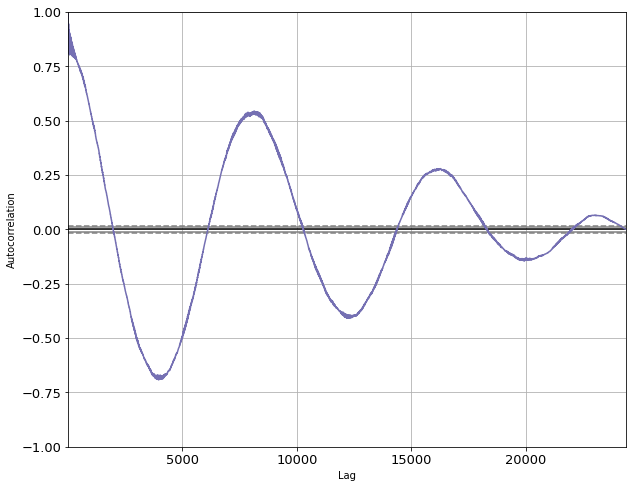

In [ ]:
pd.plotting.autocorrelation_plot(df_na['2014':'2016']['TEMP'], color=colors[2]);

In [ ]:
df_na['TEMP'].resample('1m').mean()

year_month_day_hour
2013-03-31     6.039970
2013-04-30    12.208494
2013-05-31    21.886386
2013-06-30    23.752827
2013-07-31    27.405079
2013-08-31    27.228465
2013-09-30    20.482500
2013-10-31          NaN
2013-11-30     5.434524
2013-12-31     0.896623
2014-01-31     0.023428
2014-02-28    -0.352762
2014-03-31    10.415449
2014-04-30    17.235362
2014-05-31    22.043236
2014-06-30    25.194985
2014-07-31    28.409502
2014-08-31    26.284552
2014-09-30    20.834161
2014-10-31    13.556000
2014-11-30     6.357762
2014-12-31    -0.745582
2015-01-31    -0.590377
2015-02-28     1.572512
2015-03-31     8.707613
2015-04-30    15.566570
2015-05-31    21.300275
2015-06-30    24.636691
2015-07-31    26.228630
2015-08-31    26.135854
2015-09-30    20.392206
2015-10-31    14.387465
2015-11-30     3.358686
2015-12-31    -0.053912
2016-01-31    -4.233428
2016-02-29     1.434441
2016-03-31     8.687006
2016-04-30    16.262014
2016-05-31    20.793142
2016-06-30    25.481977
2016-07-31    25.839

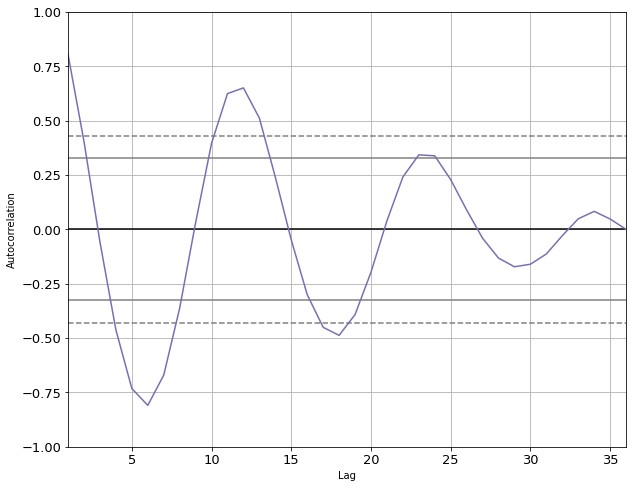

In [ ]:
pd.plotting.autocorrelation_plot(df_na['2014':'2016']['TEMP'].resample('1m').mean(), color=colors[2]);

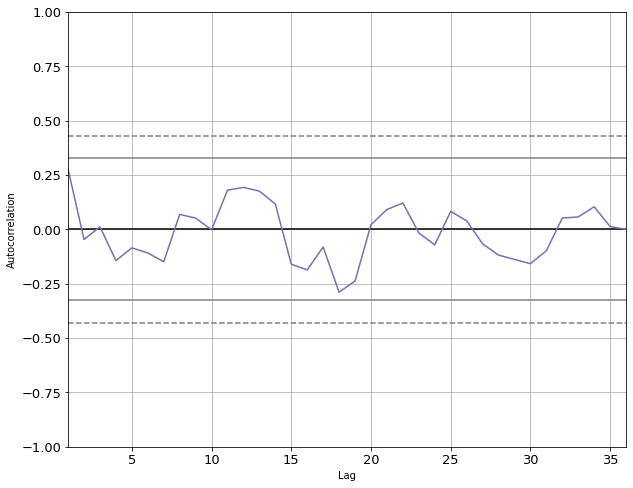

In [ ]:
pd.plotting.autocorrelation_plot(df_na['2014':'2016']['PM2.5'].resample('1m').mean(), color=colors[2]);